In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
#import matplotlib.image as mpimg

In [ ]:
img_arr = cv2.imread("maskdata/maskdata/train/with_mask/1-with-mask.jpg")

In [ ]:
plt.imshow(img_arr)

In [ ]:
plt.imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))

In [ ]:
img_arr.shape

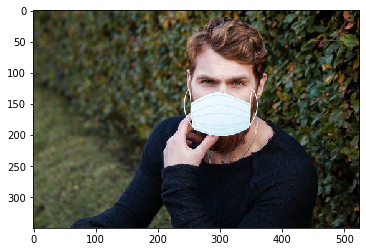

In [22]:
DataDirectory = "maskdata/maskdata/train"
Classes = ["with_mask", "without_mask"]
for category in Classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
    

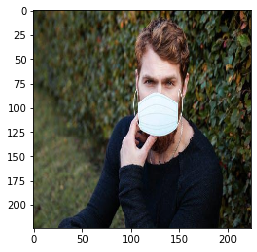

In [23]:
img_size = 224

new_array = cv2.resize(img_arr, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
training_Data = []

def create_training_Data() :
    for category in Classes:
        path = os.path.join(DataDirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_arr, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
        

In [25]:
create_training_Data()

In [26]:
print(len(training_Data))

814


In [27]:
import random
random.shuffle(training_Data)

In [28]:
X = []
Y = []

for features, label in training_Data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1,img_size, img_size, 3)

In [29]:
X.shape

(814, 224, 224, 3)

In [30]:
X = X/255.0

In [31]:
Y[800]

0

In [32]:
Y = np.array(Y)

In [ ]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump (X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump (Y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
model = tf.keras.applications.mobilenet.MobileNet()

In [37]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [38]:
base_input = model.layers[0].input

In [39]:
base_output = model.layers[-4].output

In [40]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_ouput = layers.Activation('sigmoid')(final_output)

In [41]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [42]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [43]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [44]:
new_model.fit(X, Y, epochs = 5, validation_split = 0.1)

Train on 732 samples, validate on 82 samples
Epoch 1/5
732/732 [==============================] - 134s 184ms/sample - loss: 1.6945 - accuracy: 0.8730 - val_loss: 7.0667 - val_accuracy: 0.5366
Epoch 2/5
732/732 [==============================] - 125s 171ms/sample - loss: 0.3159 - accuracy: 0.9795 - val_loss: 3.0187 - val_accuracy: 0.7927
Epoch 3/5
732/732 [==============================] - 127s 173ms/sample - loss: 0.1273 - accuracy: 0.9918 - val_loss: 0.9298 - val_accuracy: 0.9390
Epoch 4/5
732/732 [==============================] - 124s 170ms/sample - loss: 0.1068 - accuracy: 0.9918 - val_loss: 0.3719 - val_accuracy: 0.9756
Epoch 5/5
732/732 [==============================] - 125s 170ms/sample - loss: 0.0666 - accuracy: 0.9932 - val_loss: 0.0065 - val_accuracy: 1.0000


In [45]:
new_model.save("training_data.h5")

In [3]:
new_model = tf.keras.models.load_model("training_data.h5")

In [13]:
frame = cv2.imread('C:/Users/Mahima Reddem/Desktop/maskedWomen.jpg')

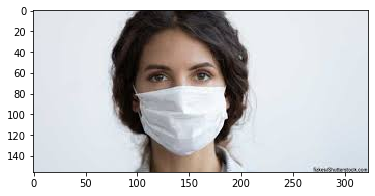

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [15]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [16]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [17]:
gray.shape

(156, 323)

In [18]:
faces = faceCascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w] 
    roi_color = frame[y:y+h, x:x+w]

    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) 
    facess = faceCascade.detectMultiScale(roi_gray)

    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess: 
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

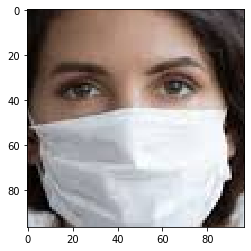

In [19]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [20]:
final_image = cv2.resize(frame, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [21]:
Predictions = new_model.predict(final_image)

In [22]:
Predictions

array([[2.8154922]], dtype=float32)

In [23]:
import winsound
frequency = 500
duration = 1000

import cv2 
import numpy as np


path = "haarcascade_frontalface_default.xml"

font_scale=1.5

font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture(1)

#Check if the webcam is opened

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for x,y,w,h in faces:

        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = frame[y:y+h, x:x+w]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) 
        facess = faceCascade.detectMultiScale(roi_gray)

        if len(facess) == 0:

            print("Face not detected")

        else:
            for (ex, ey, ew, eh) in facess: 
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]

    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0) 
    final_image=final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX

    Predictions = new_model.predict(final_image)
    #print(Predictions)

    font_scale = 1.5

    font = cv2.FONT_HERSHEY_PLAIN

    if (Predictions > 0):
        status = "No Mask"

        x1,y1,w1,h1 = 0,0,175,75
               
        cv2.putText(frame, status, (100, 150), font, 3,(0, 0, 255),2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        #winsound.Beep(frequency, duration)

    else:
        status = "Face Mask"

        x1,y1,w1,h1 = 0,0,175,75
     
        cv2.putText(frame, status, (100, 150), font, 3,(0, 255,0),2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255,0))


    cv2.imshow('Face Mask Detection', frame)

    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
